In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
bank=pd.read_csv("/content/drive/My Drive/Datasets/bank-full.csv")

In [0]:
bank.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,dur_bin,bal_bin,pdays_bin,previous_bin,age_bin1,day_bin1,campaign_bin1,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[-1,185)","[0,2)",>=56,"[5,7)",<3,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[-1,185)","[0,2)","[36,56)","[5,7)",<3,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,<89,<22,"[-1,185)","[0,2)",<36,"[5,7)",<3,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[-1,185)","[0,2)","[36,56)","[5,7)",<3,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,"[180,368)",<22,"[-1,185)","[0,2)",<36,"[5,7)",<3,0


In [6]:
bank.shape

(45211, 17)

In [7]:
bank.dtypes

job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
poutcome         object
dur_bin          object
bal_bin          object
pdays_bin        object
previous_bin     object
age_bin1         object
day_bin1         object
campaign_bin1    object
y                 int64
dtype: object

In [8]:
bank.isnull().sum()

job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
poutcome         0
dur_bin          0
bal_bin          0
pdays_bin        0
previous_bin     0
age_bin1         0
day_bin1         0
campaign_bin1    0
y                0
dtype: int64

In [9]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

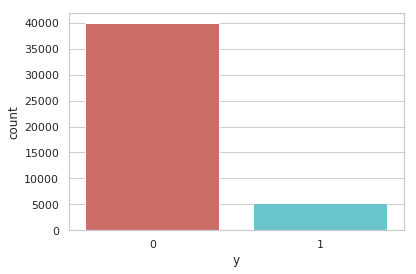

<Figure size 432x288 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y',data=bank, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
col=['job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'dur_bin', 'bal_bin', 'previous_bin',
       'age_bin1', 'campaign_bin1']
col

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'dur_bin',
 'bal_bin',
 'previous_bin',
 'age_bin1',
 'campaign_bin1']

In [0]:
for var in col:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)
    bank=bank1

In [13]:
bank.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,dur_bin,bal_bin,pdays_bin,previous_bin,age_bin1,day_bin1,campaign_bin1,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,dur_bin_<89,dur_bin_>=548,"dur_bin_[180,368)","dur_bin_[368,548)","dur_bin_[89,180)",bal_bin_<22,bal_bin_>=1860,"bal_bin_[1130,1860)","bal_bin_[131,448)","bal_bin_[22,131)","bal_bin_[448,1130)",previous_bin_>-2,"previous_bin_[0,2)",age_bin1_<36,age_bin1_>=56,"age_bin1_[36,56)",campaign_bin1_<3,campaign_bin1_>=5,"campaign_bin1_[3,5)"
0,management,married,tertiary,no,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[-1,185)","[0,2)",>=56,"[5,7)",<3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[-1,185)","[0,2)","[36,56)","[5,7)",<3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,<89,<22,"[-1,185)","[0,2)",<36,"[5,7)",<3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[-1,185)","[0,2)","[36,56)","[5,7)",<3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0
4,unknown,single,unknown,no,no,no,unknown,may,unknown,"[180,368)",<22,"[-1,185)","[0,2)",<36,"[5,7)",<3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0


In [0]:
bank = bank.drop("pdays_bin", axis=1)

In [0]:
bank = bank.drop("day_bin1", axis=1)

In [0]:
bank = bank.drop("default", axis=1)

In [17]:
bank.head()

,job,marital,education,housing,loan,contact,month,poutcome,dur_bin,bal_bin,previous_bin,age_bin1,campaign_bin1,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,dur_bin_<89,dur_bin_>=548,"dur_bin_[180,368)","dur_bin_[368,548)","dur_bin_[89,180)",bal_bin_<22,bal_bin_>=1860,"bal_bin_[1130,1860)","bal_bin_[131,448)","bal_bin_[22,131)","bal_bin_[448,1130)",previous_bin_>-2,"previous_bin_[0,2)",age_bin1_<36,age_bin1_>=56,"age_bin1_[36,56)",campaign_bin1_<3,campaign_bin1_>=5,"campaign_bin1_[3,5)"
0,management,married,tertiary,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[0,2)",>=56,<3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1,technician,single,secondary,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[0,2)","[36,56)",<3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown,<89,<22,"[0,2)",<36,<3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0
3,blue-collar,married,unknown,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[0,2)","[36,56)",<3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0
4,unknown,single,unknown,no,no,unknown,may,unknown,"[180,368)",<22,"[0,2)",<36,<3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0


In [0]:
bank_final_vars=bank.columns.values.tolist()
y=['y']
X=[i for i in bank_final_vars if i not in y]

In [19]:
len(X)

74

In [20]:
X=X[13:]
X

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'dur_bin_<89',
 'dur_bin_>=548',
 'dur_bin_[180,368)',
 'dur_bin_[368,548)',
 'dur_bin_[89,180)',
 'bal_bin_<22',
 'bal_bin_>=1860',
 'bal_bin_[1130,1860)',
 'bal_bin_[131,448)',
 'bal_bin_[22,131)',
 'bal_bin_[448,1130)',
 'previous_bin_>-2',
 'previous_bin_[0

In [0]:
bank_og=bank[X]

In [0]:
bank_og_y=bank[y]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(bank_og, bank_og_y, test_size=0.3, random_state=0)
columns = X_train.columns
columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'dur_bin_<89', 'dur_bin_>=548', 'dur_bin_[180,368)',
       'dur_bin_[368,548)', 'dur_bin_[89,180)', 'bal_bin_<22',
       'bal_bin_>=1860', 'bal_bin_[1130,1860)', 'bal_bin_[131,448)',
       'bal_bin_[22,131)', 'bal_bin_[448,1

#### Data Preparation for model fitting

In [0]:
# SMOTE

os = SMOTE(random_state=0)


In [25]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  55906
Number of no subscription in oversampled data 27953
Number of subscription 27953
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [0]:
X1=os_data_X
y1=os_data_y['y']

In [28]:
X1.shape

(55906, 61)

##### Logistic Regression

In [0]:
lr=LogisticRegression()

In [30]:
lr.fit(X1,y1)
Predlr=lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
accuracy_score(Predlr,y_test), cohen_kappa_score(Predlr,y_test)

(0.8921409613683279, 0.40694636791435024)

In [32]:
print(classification_report(y_test, Predlr))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11969
           1       0.56      0.40      0.47      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.68      0.70     13564
weighted avg       0.88      0.89      0.88     13564



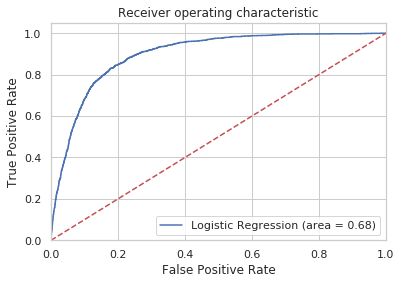

In [33]:
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Decision Tree

In [34]:
treemodel = DecisionTreeClassifier()
treemodel.fit(X1,y1)

Predtree = treemodel.predict(X_test)
accuracy_score(Predtree,y_test),cohen_kappa_score(Predtree,y_test)

(0.8672957829548805, 0.36192936136329557)

In [35]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(X1, y1)
dt2_score_train = dt2.score(X1, y1)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(X_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7506171072872322
Testing score:  0.8747419640224122


In [36]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(X1, y1)
dt4_score_train = dt4.score(X1, y1)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(X_test, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7727793081243516
Testing score:  0.6548953111176644


In [37]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(X1, y1)
dt1_score_train = dt1.score(X1, y1)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(X_test, y_test)
print("Testing score: ", dt1_score_test)

Training score:  0.993024004579115
Testing score:  0.8686228251253317


In [38]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7506171072872322   0.8747419640224122
4        0.7727793081243516   0.6548953111176644
max       0.993024004579115   0.8686228251253317


In [39]:
treemodel.score(X_test,y_test)

0.8672957829548805

It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.

In [40]:
decisionTree_roc_auc = roc_auc_score(y_test, dt2.predict(X_test))
print(decisionTree_roc_auc)

0.7247027915112997


##### Random Forest

In [41]:
rand_model = RandomForestClassifier()
rand_model.fit(X1,y1)
Pred_rand_model = rand_model.predict(X_test)
accuracy_score(Pred_rand_model,y_test),cohen_kappa_score(Pred_rand_model,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.8887496313771749, 0.40020072160848297)

In [42]:
print('Accuracy of random forest on test set: {:.4f}'.format(metrics.accuracy_score(y_test,Pred_rand_model)))

Accuracy of random forest on test set: 0.8887


In [43]:
print(classification_report(y_test, Pred_rand_model))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11969
           1       0.54      0.40      0.46      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.68      0.70     13564
weighted avg       0.88      0.89      0.88     13564



In [44]:
RandomForest_roc_auc = roc_auc_score(y_test, Pred_rand_model)
print(RandomForest_roc_auc)

0.678842364719098


#### Lift and Gain 

In [0]:
bank_new=bank.iloc[:,:14]

In [46]:
bank_new.head()

,job,marital,education,housing,loan,contact,month,poutcome,dur_bin,bal_bin,previous_bin,age_bin1,campaign_bin1,y
0,management,married,tertiary,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[0,2)",>=56,<3,0
1,technician,single,secondary,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[0,2)","[36,56)",<3,0
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown,<89,<22,"[0,2)",<36,<3,0
3,blue-collar,married,unknown,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[0,2)","[36,56)",<3,0
4,unknown,single,unknown,no,no,unknown,may,unknown,"[180,368)",<22,"[0,2)",<36,<3,0


In [0]:
bank_new['Predicted y']=lr.predict(bank_og)

In [48]:
len(bank_new)

45211

In [0]:
bank_new['P(Y=0)']=lr.predict_proba(bank_og)[:,0]
bank_new['P(Y=1)']=lr.predict_proba(bank_og)[:,1]

In [51]:
bank_new.head()

,job,marital,education,housing,loan,contact,month,poutcome,dur_bin,bal_bin,previous_bin,age_bin1,campaign_bin1,y,Predicted y,P(Y=0),P(Y=1)
0,management,married,tertiary,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[0,2)",>=56,<3,0,0,0.962112,0.037888
1,technician,single,secondary,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[0,2)","[36,56)",<3,0,0,0.992445,0.007555
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown,<89,<22,"[0,2)",<36,<3,0,0,0.999080,0.000920
3,blue-collar,married,unknown,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[0,2)","[36,56)",<3,0,0,0.993237,0.006763
4,unknown,single,unknown,no,no,unknown,may,unknown,"[180,368)",<22,"[0,2)",<36,<3,0,0,0.969770,0.030230


In [56]:
bank_new['P(Y=0)'][45]

0.9816250818577364

In [65]:
a

['x', 'y']

In [0]:
a.append('y')

In [0]:
probs=[]

In [0]:
for i in range(0,len(bank_new)):
  if (bank_new['Predicted y'][i]==0):
    probs.append(bank_new['P(Y=0)'][i])
  elif(bank_new['Predicted y'][i]==1):
    probs.append(bank_new['P(Y=1)'][i])

In [67]:
probs

[0.9621115465408864,
 0.9924453970999624,
 0.9990804117856348,
 0.9932370263239622,
 0.9697700364965236,
 0.9879125823020078,
 0.9728159782310105,
 0.9646165135135341,
 0.9975510823520318,
 0.9971381916688506,
 0.9695917383845909,
 0.9857530561111424,
 0.9698498227334496,
 0.9980374839503473,
 0.9914079700230617,
 0.9760393811729734,
 0.9927522910344408,
 0.9982438471595771,
 0.9768215601155571,
 0.9981911452156047,
 0.9835967461231192,
 0.9881928013455786,
 0.9949728813961157,
 0.9806642622996957,
 0.98951839707107,
 0.9940212238014688,
 0.9660886730017169,
 0.9972312672239811,
 0.9801838704659522,
 0.9831919273711275,
 0.9671857442299757,
 0.9737564090355413,
 0.9855151733468448,
 0.9824928951719958,
 0.9691694386243134,
 0.9745002482911,
 0.9819133353845996,
 0.7217479628752549,
 0.7126566961274029,
 0.9922271087550473,
 0.9895089677139408,
 0.98282669662193,
 0.9980697005694502,
 0.7287011438544395,
 0.7506229923390855,
 0.9816250818577364,
 0.9799956513422218,
 0.9855762571924634,

In [0]:
bank_new['Prediction probability']=probs

In [69]:
bank_new.head()

,job,marital,education,housing,loan,contact,month,poutcome,dur_bin,bal_bin,previous_bin,age_bin1,campaign_bin1,y,Predicted y,P(Y=0),P(Y=1),Prediction probability
0,management,married,tertiary,yes,no,unknown,may,unknown,"[180,368)",>=1860,"[0,2)",>=56,<3,0,0,0.962112,0.037888,0.962112
1,technician,single,secondary,yes,no,unknown,may,unknown,"[89,180)","[22,131)","[0,2)","[36,56)",<3,0,0,0.992445,0.007555,0.992445
2,entrepreneur,married,secondary,yes,yes,unknown,may,unknown,<89,<22,"[0,2)",<36,<3,0,0,0.999080,0.000920,0.999080
3,blue-collar,married,unknown,yes,no,unknown,may,unknown,"[89,180)","[1130,1860)","[0,2)","[36,56)",<3,0,0,0.993237,0.006763,0.993237
4,unknown,single,unknown,no,no,unknown,may,unknown,"[180,368)",<22,"[0,2)",<36,<3,0,0,0.969770,0.030230,0.969770


In [0]:
lr.predict_proba(X)

array([[9.62111547e-01, 3.78884535e-02],
       [9.92445397e-01, 7.55460290e-03],
       [9.99080412e-01, 9.19588214e-04],
       ...,
       [4.66312733e-02, 9.53368727e-01],
       [8.50418324e-01, 1.49581676e-01],
       [9.05948375e-01, 9.40516253e-02]])

In [0]:
import sklearn.metrics

def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):

  df.sort_values(by=probability_col, ascending=False, inplace=True)

  subset = df[df[predicted_col] == True]

  rows = []
  for group in np.array_split(subset, 10):
      score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                                 group[predicted_col].tolist(),
                                                 normalize=False)

      rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

  lift = pd.DataFrame(rows)

  #Cumulative Gains Calculation
  lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
  lift['PercentCorrect'] = lift.apply(
      lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
  lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
  lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
      lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
          'NumCorrectPredictions'].sum()) * x)
  lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
  lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
  lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
      lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

  #Lift Chart
  lift['NormalisedPercentAvg'] = 1
  lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

  return lift

In [71]:
calc_cumulative_gains(bank_new, 'y', 'Predicted y', 'Prediction probability')

,NumCases,NumCorrectPredictions,RunningCorrect,PercentCorrect,CumulativeCorrectBestCase,PercentCorrectBestCase,AvgCase,CumulativeAvgCase,PercentAvgCase,NormalisedPercentAvg,NormalisedPercentWithModel
0,368,284,284,13.135985,368,17.021277,216.2,216.2,10.0,1,1.313599
1,368,270,554,25.624422,736,34.042553,216.2,432.4,20.0,1,1.281221
2,368,244,798,36.910268,1104,51.063830,216.2,648.6,30.0,1,1.230342
3,368,215,1013,46.854764,1472,68.085106,216.2,864.8,40.0,1,1.171369
4,368,215,1228,56.799260,1840,85.106383,216.2,1081.0,50.0,1,1.135985
5,367,190,1418,65.587419,2207,100.000000,216.2,1297.2,60.0,1,1.093124
6,367,180,1598,73.913043,2574,100.000000,216.2,1513.4,70.0,1,1.055901
7,367,198,1796,83.071230,2941,100.000000,216.2,1729.6,80.0,1,1.038390
8,367,187,1983,91.720629,3308,100.000000,216.2,1945.8,90.0,1,1.019118
9,367,179,2162,100.000000,3675,100.000000,216.2,2162.0,100.0,1,1.000000


In [0]:
import matplotlib.pyplot as plt
def plot_cumulative_gains(lift: pd.DataFrame):
    fig, ax = plt.subplots()
    fig.canvas.draw()

    handles = []
    handles.append(ax.plot(lift['PercentCorrect'], 'r-', label='Percent Correct Predictions'))
    handles.append(ax.plot(lift['PercentCorrectBestCase'], 'g-', label='Best Case (for current model)'))
    handles.append(ax.plot(lift['PercentAvgCase'], 'b-', label='Average Case (for current model)'))
    ax.set_xlabel('Total Population (%)')
    ax.set_ylabel('Number of Respondents (%)')

    ax.set_xlim([0, 9])
    ax.set_ylim([10, 100])

    labels = [int((label+1)*10) for label in [float(item.get_text()) for item in ax.get_xticklabels()]]

    ax.set_xticklabels(labels)

    fig.legend(handles, labels=[h[0].get_label() for h in handles])
    fig.show()

ValueError: ignored

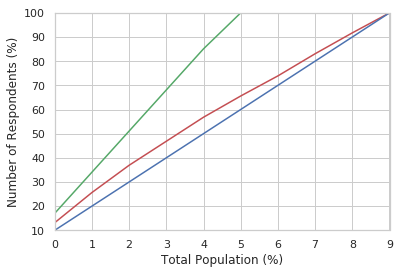

In [76]:
plot_cumulative_gains(calc_cumulative_gains(bank_new, 'y', 'Predicted y', 'Prediction probability'))

In [0]:
def plot_lift_chart(lift: pd.DataFrame):
    plt.figure()
    plt.plot(lift['NormalisedPercentAvg'], 'r-', label='Normalised \'response rate\' with no model')
    plt.plot(lift['NormalisedPercentWithModel'], 'g-', label='Normalised \'response rate\' with using model')
    plt.legend()
    plt.show()

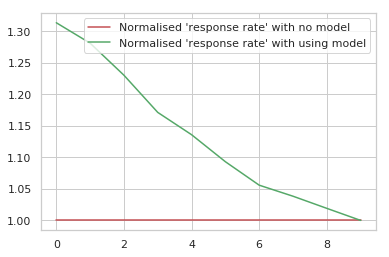

In [78]:
plot_lift_chart(calc_cumulative_gains(bank_new, 'y', 'Predicted y', 'Prediction probability'))